In [55]:
from skimage import color
from skimage.morphology import disk
import Dataset

dataset_list = Dataset.get_full_dataset()

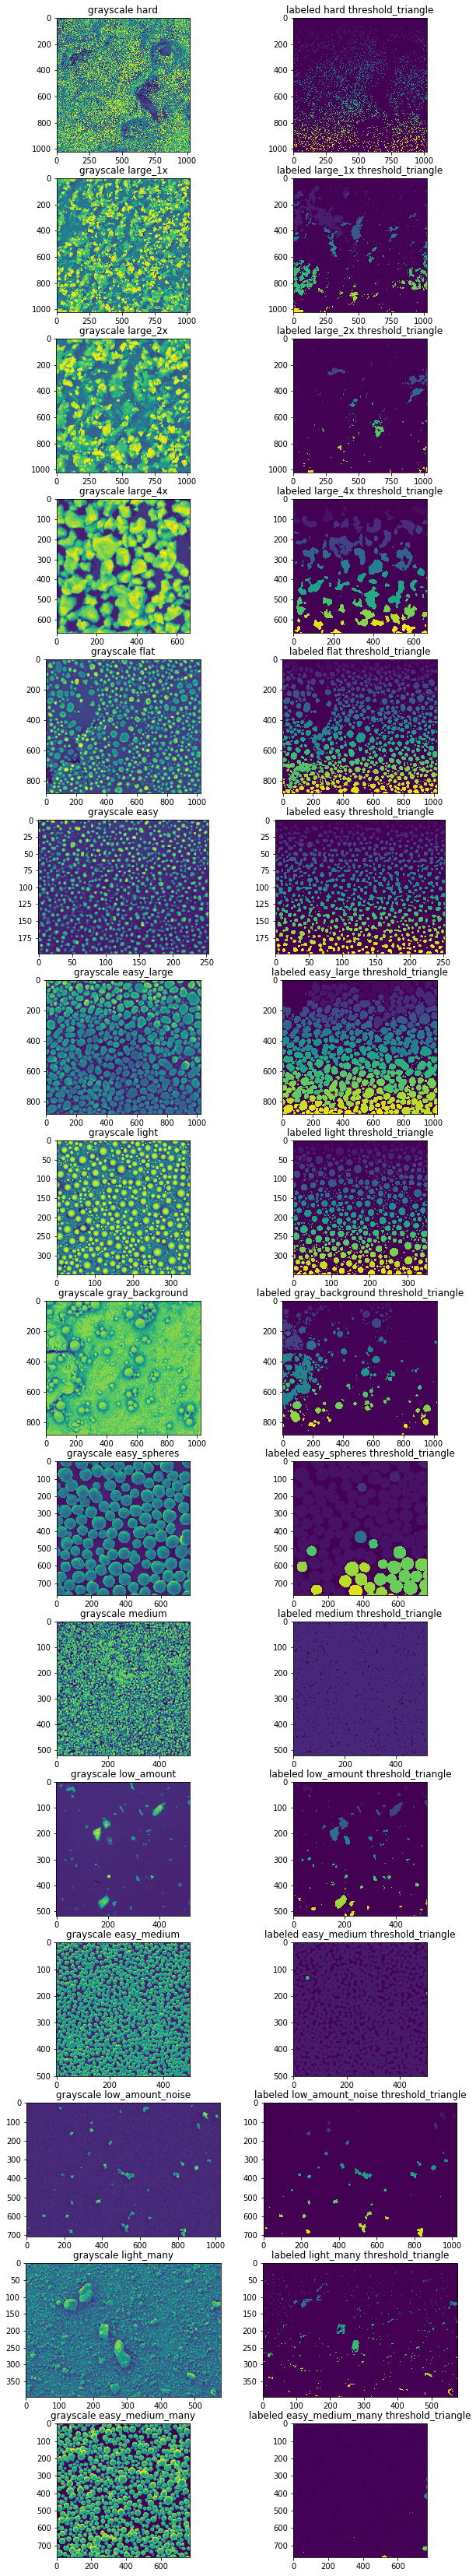

In [56]:
from skimage.filters import threshold_triangle, rank
from scipy.ndimage import label
import matplotlib.pyplot as plot

log = []
row_amount = len(dataset_list)

plot.figure(figsize=(10, 60))
for i, data in enumerate(dataset_list):
    image, title = data['image'], data['title']
    
    image = color.rgb2gray(image)
    image = rank.median(image, disk(2))          # denoise
    
    plot.subplot(row_amount, 2, i*2 + 1)
    plot.imshow(image)
    plot.title(f'grayscale {title}')
    
    threshold_function = threshold_triangle
    threshold_value = threshold_function(image)
    binary = image > threshold_value
    
    labeled, amount = label(binary)
    
    plot.subplot(row_amount, 2, i*2 + 2)
    plot.imshow(labeled)
    plot.title(f'labeled {title} {threshold_function.__name__}')
    
    log.append(f'amount {title} {threshold_function.__name__}: {amount}')
    
plot.show()

In [57]:
print(*log, sep='\n')



amount hard threshold_triangle: 16918
amount large_1x threshold_triangle: 1530
amount large_2x threshold_triangle: 1835
amount large_4x threshold_triangle: 1363
amount flat threshold_triangle: 806
amount easy threshold_triangle: 617
amount easy_large threshold_triangle: 354
amount light threshold_triangle: 1052
amount gray_background threshold_triangle: 1243
amount easy_spheres threshold_triangle: 40
amount medium threshold_triangle: 9
amount low_amount threshold_triangle: 217
amount easy_medium threshold_triangle: 14
amount low_amount_noise threshold_triangle: 229
amount light_many threshold_triangle: 759
amount easy_medium_many threshold_triangle: 90
